In [1]:
from sklearn.ensemble import GradientBoostingRegressor
from utils import load_data, split_data, cross_validate_model, get_optimal_params

# Load data and set up cross-validation
data = load_data()
X, y, kfold = split_data(data)

Loaded 553 rows from CSV
Data split into 10 folds


# Algorithm 2: Gradient Boosting Regressor
---
In this notebook I will implement, tune and analyse Gradient Boosting Regressor to predict the tensile strength of steel

Fold 1:
  Train - R²: 0.9632, MAE: 12.58
  Test  - R²: 0.9416, MAE: 18.70
Fold 2:
  Train - R²: 0.9651, MAE: 12.72
  Test  - R²: 0.9211, MAE: 19.26
Fold 3:
  Train - R²: 0.9682, MAE: 12.23
  Test  - R²: 0.8586, MAE: 20.20
Fold 4:
  Train - R²: 0.9646, MAE: 12.70
  Test  - R²: 0.9289, MAE: 18.20
Fold 5:
  Train - R²: 0.9680, MAE: 12.73
  Test  - R²: 0.8569, MAE: 22.76
Fold 6:
  Train - R²: 0.9640, MAE: 13.02
  Test  - R²: 0.9120, MAE: 15.92
Fold 7:
  Train - R²: 0.9653, MAE: 12.72
  Test  - R²: 0.8737, MAE: 23.27
Fold 8:
  Train - R²: 0.9668, MAE: 12.26
  Test  - R²: 0.9046, MAE: 19.40
Fold 9:
  Train - R²: 0.9632, MAE: 12.47
  Test  - R²: 0.8853, MAE: 24.44
Fold 10:
  Train - R²: 0.9646, MAE: 12.78
  Test  - R²: 0.9387, MAE: 18.10


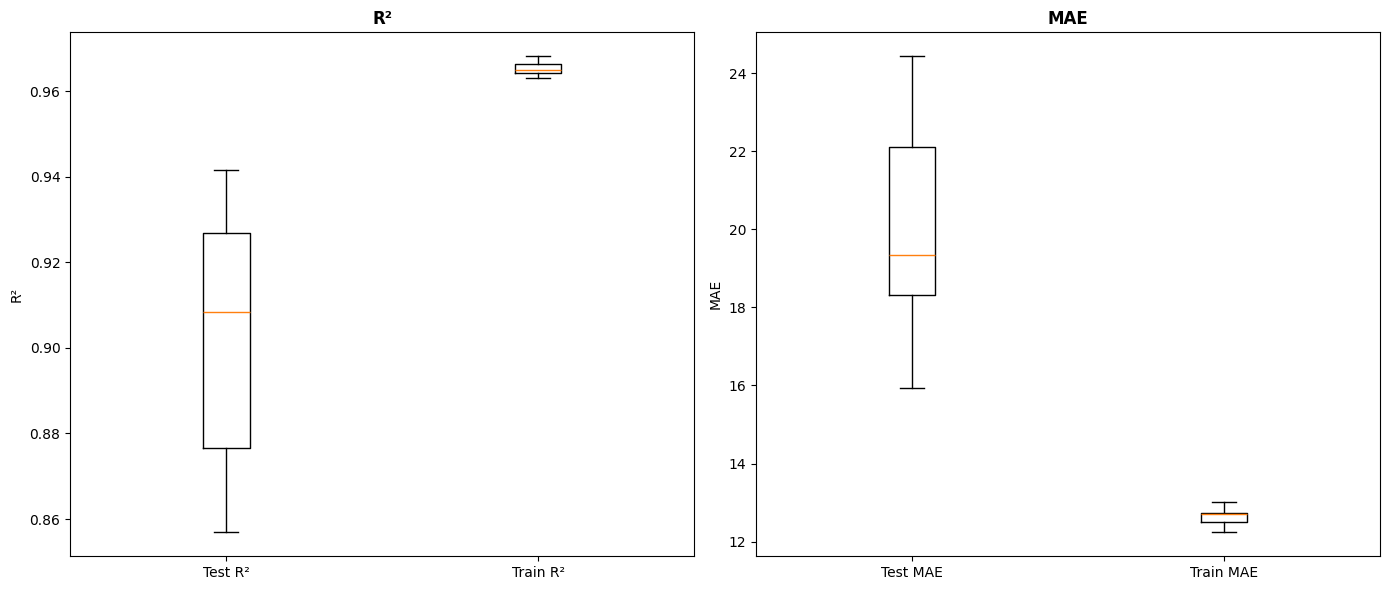

Mean Results Across Folds:
  Train R²:  0.9653
  Test R²:   0.9021
  Train MAE: 12.62
  Test MAE:  20.03


In [2]:
results = cross_validate_model(
    GradientBoostingRegressor,
    X, y, kfold,
    n_estimators=100,
    max_depth=3,
    random_state=42
)

Best params: {'max_depth': 5, 'n_estimators': 200}
Fold 1:
  Train - R²: 0.9987, MAE: 2.29
  Test  - R²: 0.9417, MAE: 18.55
Fold 2:
  Train - R²: 0.9989, MAE: 2.25
  Test  - R²: 0.9300, MAE: 16.41
Fold 3:
  Train - R²: 0.9988, MAE: 2.22
  Test  - R²: 0.8960, MAE: 17.12
Fold 4:
  Train - R²: 0.9988, MAE: 2.28
  Test  - R²: 0.9373, MAE: 17.37
Fold 5:
  Train - R²: 0.9989, MAE: 2.19
  Test  - R²: 0.8679, MAE: 22.06
Fold 6:
  Train - R²: 0.9987, MAE: 2.38
  Test  - R²: 0.9294, MAE: 15.18
Fold 7:
  Train - R²: 0.9988, MAE: 2.23
  Test  - R²: 0.9210, MAE: 17.15
Fold 8:
  Train - R²: 0.9990, MAE: 2.09
  Test  - R²: 0.8593, MAE: 22.33
Fold 9:
  Train - R²: 0.9987, MAE: 2.25
  Test  - R²: 0.9136, MAE: 20.89
Fold 10:
  Train - R²: 0.9986, MAE: 2.36
  Test  - R²: 0.9515, MAE: 14.08


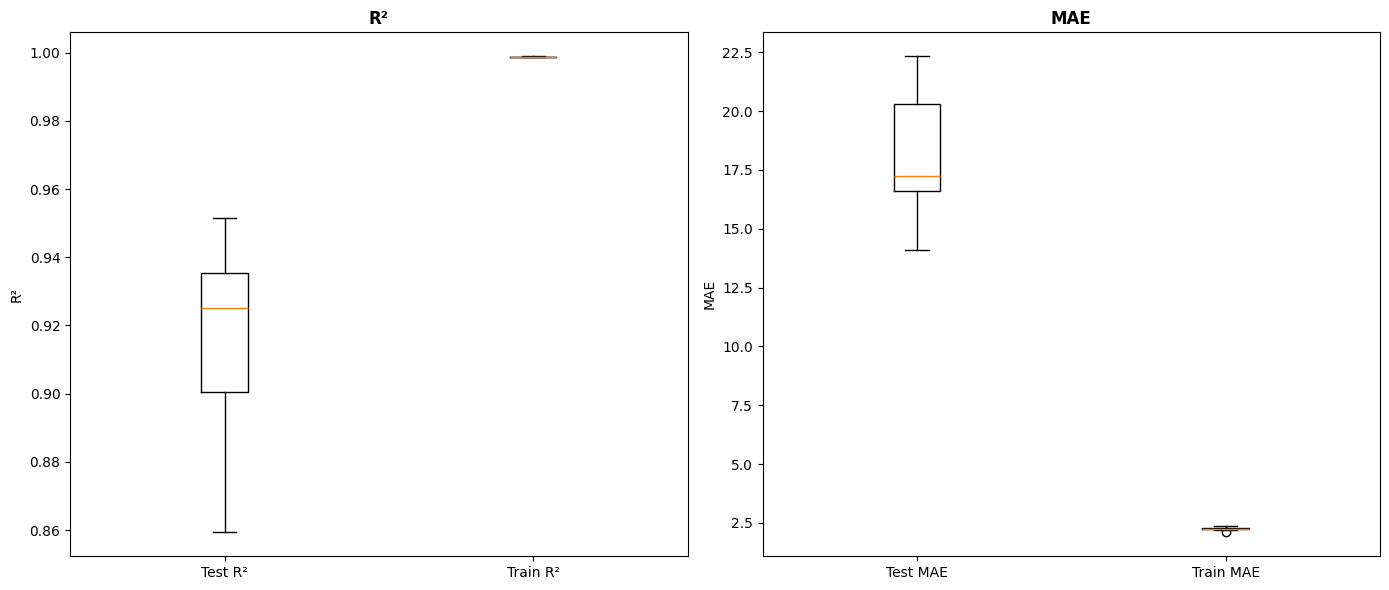

Mean Results Across Folds:
  Train R²:  0.9988
  Test R²:   0.9148
  Train MAE: 2.25
  Test MAE:  18.11


In [4]:
param_grid = {
    'n_estimators': [50, 100, 200, 300],
    'max_depth': [5, 10, 15, 20, None]
}

model = GradientBoostingRegressor(random_state=42)

best_params = get_optimal_params(model, param_grid, X, y, kfold)

best_results = cross_validate_model(GradientBoostingRegressor, X, y, kfold,
    n_estimators=best_params['n_estimators'],
    max_depth=best_params['max_depth'],
    random_state=42
)